# Linear Regression Model with PyTorch

This tutorial demonstrates how to build a simple linear regression model using PyTorch.

## Table of Contents
1. [PyTorch Setup](#pytorch-setup)
2. [Preparing the Data](#preparing-the-data)
3. [Visualizing the Data](#visualizing-the-data)
4. [Building the Model](#building-the-model)
5. [Training the Model](#training-the-model)
6. [Making and Evaluating Predictions](#making-and-evaluating-predictions)
7. [Saving and Loading the Model](#saving-and-loading-the-model)

## 1. PyTorch Setup

Import the required libraries and set up PyTorch to use the GPU if available.

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


## 2. Preparing the Data

Let's create a simple dataset for linear regression using the formula:

**y = weight * x + bias**

In [ ]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

### Splitting the dataset

We split our data into training and test sets (80/20).

In [ ]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

## 3. Visualizing the Data

We define a function to plot the training data, test data, and predictions (if any).

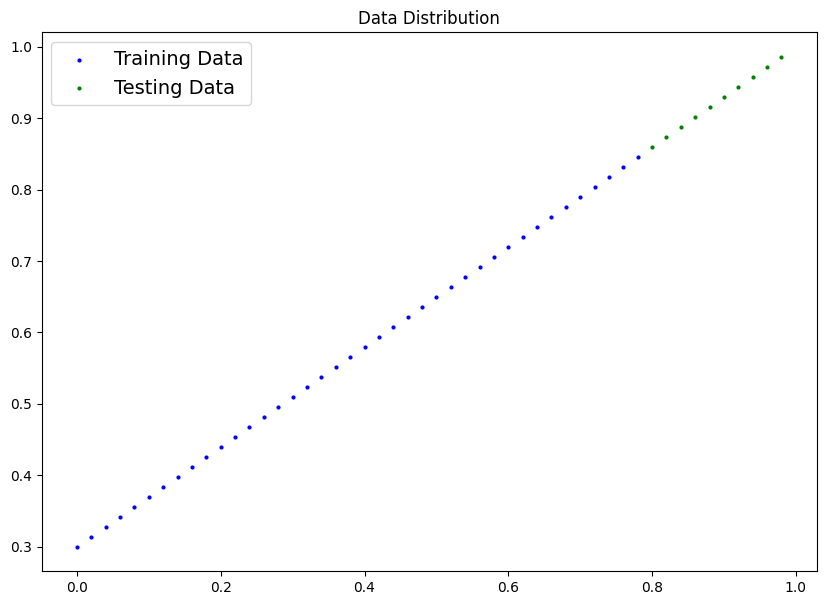

In [ ]:
def plot_predictions(train_data=X_train, train_labels=y_train,
                     test_data=X_test, test_labels=y_test, predictions=None):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing Data")
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
    plt.legend(prop={"size": 14})
    plt.title("Data Distribution")
plot_predictions()

## 4. Building the Model

Now we will define a simple linear model using PyTorch's `nn.Module`.

In [ ]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LinearRegressionModel()
model_1.to(device)
model_1, model_1.state_dict()

(LinearRegressionModel(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

Our model is now inizialized with random weights and biases.
This means it's predictions will fit very badly the training data.

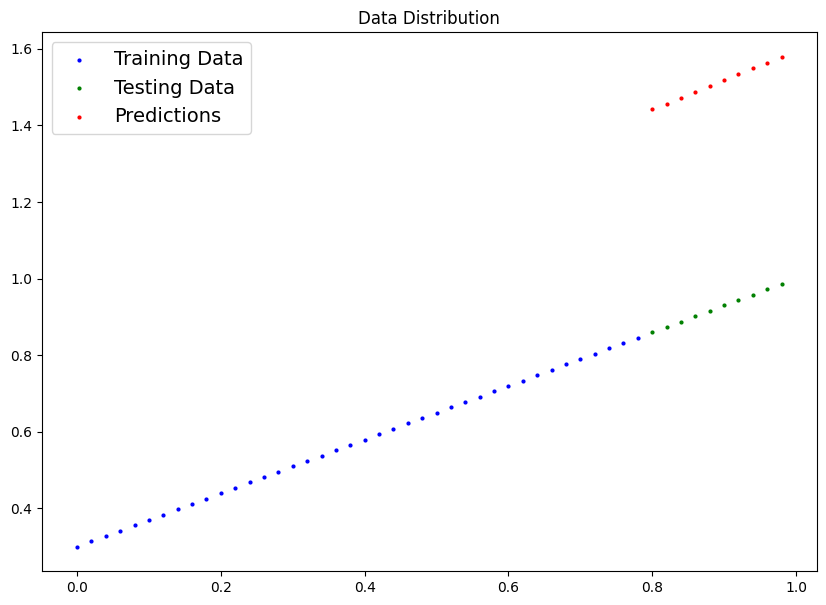

In [ ]:
y_pred = model_1(X_test)
plot_predictions(predictions=y_pred.detach().numpy())

## 5. Training the Model

To train the model, we need:
- A loss function
- An optimizer
- A training loop

In [ ]:
loss_fn = nn.L1Loss() # MAE, Mean Absolute Error
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01) # SGD, Stochastic Gradient Descent

In [ ]:
torch.manual_seed(42)
epochs = 200

X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    model_1.train()
    y_pred = model_1(X_train) # Calculate predictions
    loss = loss_fn(y_pred, y_train) # Calculate the loss
    optimizer.zero_grad()
    loss.backward() # Perform Backpropagation
    optimizer.step() # Perform Gradient Descent

## 6. Making and Evaluating Predictions

Now we use the trained model to make predictions on the test set and visualize the results.

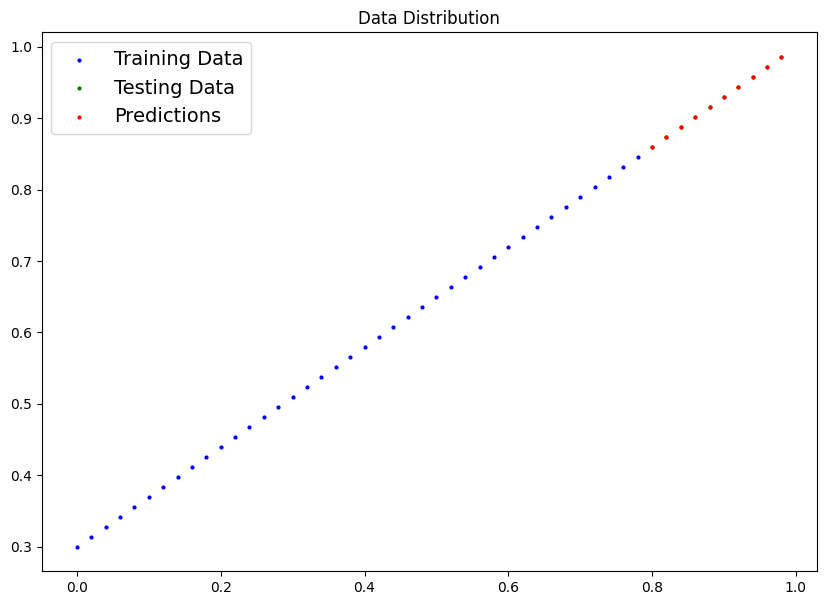

In [ ]:
model_1.eval()
with torch.inference_mode():
    test_pred = model_1(X_test)
plot_predictions(predictions=test_pred.cpu())

## 7. Saving and Loading the Model

We can save the model's state dictionary to a file and reload it later.

In [ ]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_linear_regression_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)

In [ ]:
loaded_model = LinearRegressionModel()
loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model.to(device)
loaded_model.eval()

with torch.inference_mode():
    loaded_preds = loaded_model(X_test)

print(torch.equal(loaded_preds, test_pred))  # Should be True

True
